## Astronomy 406 "Computational Astrophysics" (Fall 2017)

### Week 1: Principles of numerical modeling and data analysis. Introduction to Python. Interpolation

<b>Reading:</b> notes below, as well as $\S$[1.1](https://umich.instructure.com/files/2316659/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes), and $\S$[1.4](https://umich.instructure.com/files/2316615/download?download_frd=1), 2.5, Appendix A of [Statistics, Data Mining, and Machine Learning in Astronomy](http://press.princeton.edu/titles/10159.html).

#### Why Python?

<b>Python.</b> Python is an open-source (which means, free) programming language with a large number of supporting packages for data analysis and numerical statistics. It is well suited for this course, and I recommend learning it.  

<b>Install.</b> You need to install Python (LSA provides Anaconda distributions) with standard libraries (matplotlib, numpy, scipy, sklearn).  See our [Syllabus Google Doc](https://docs.google.com/document/d/1pgZhudmqgLXIW-zFRn5O9BlZh9vF2JT8kIkczL3dPBw/view) for details.

<b>AstroML.</b> You should also install [AstroML python library](https://pypi.python.org/pypi/astroML/). (It is already included in the LSA Anaconda distribution.) We will use it in many examples of data analysis. This library was developed to support the book on [Statistics, Data Mining, and Machine Learning in Astronomy](http://press.princeton.edu/titles/10159.html) by Ivezic et al.

#### How to use IPython Notebook

We will be using IPython Notebooks for lecture materials and code examples. They simplify work flow and connect plots of the results with the code that produces them. You can use these codes as a starting point for your own experimentation.

IPython Notebooks work by running a fully functional Python server behind the scenes.  Inside the Notebook, the content is divided into cells containing code or text.  This cell you are reading is a text cell.  The one below it, starting with "In [ ]:" is a code cell.

You can edit cells below to add your own code. To do this, click on the cell to start editing and then type as you normally would. To execute the code contained in the cell, press Shift-Enter. Even for existing cells that you do not need to edit, you should select them and type Shift-Enter when you get there because the cells below generally depend on the previous cells being executed first.

To get started, edit the cell below to assign your name to the variable name and then press Shift-Enter to execute the cell.

In [57]:
name = "Adam Rubinstein"
print "Hello", name

Hello Adam Rubinstein


#### Numerical Calculation vs. Analytical Calculation

In some ways, a numerical solution of an equation is simply an alternative to an analytical solution.  For many equations we encounter in real world problems, numerical solution is the only option.  However, it is important to realize, and always keep in mind, that in other ways a numerical solution is fundamentally different from an analytical one.  A numerical answer is never exact.

#### Sources of Error

With any algorithm, there are always two sources of error: <i>roundoff error</i> and <i>truncation error</i>.

<i>Roundoff error</i> arises from the error inherent in representing a floating point number
with a finite number of bits in the computer memory.  Look at the example below that demonstrates roundoff error.

##### Example: Roundoff Error and Machine Precision

Find $\epsilon$ that satisfies the equation $$1 + \epsilon = 1.$$ You would think (in the analytical world) that it simply means $\epsilon = 0$.  However, in the numerical world we find that this equation is satisfied when the value of $\epsilon > 0$.  What is that strange value?  It is the limit of machine precision.  

Let's start with $\epsilon = 1$ and iterate, halving $\epsilon$ each time until in the computer representation $1 + \epsilon = 1$.  Try it (Shift-Enter to execute the cell below).

In [58]:
eps = 1.0

while 1.0+eps != 1.0:
    eps = eps/2.

print 'eps = %.2e' %( eps )

eps = 1.11e-16


This value of $\epsilon \sim 10^{-16}$ corresponds to "double floating point" accuracy.  It is a traditional name for the real number represented by 8 bytes in the computer memory.

Note our first piece of code in Python.  It is fairly self-explanatory and, unlike some other programming languages, straighforward to read.  First, we assign a value to our variable <i>eps</i>, and then run a loop that keeps halving <i>eps</i> while $1 + \epsilon \neq 1$.  After the loop exits, we print the value of <i>eps</i>.  Note the print statement allows formatted output.  It will become very handy when we have several numbers to output. 

Now let's consider <i>truncation error</i>. Truncation error is a feature of an algorithm: we approximate an equation or function by expanding about some small quantity. By throwing away
higher-order terms, we are truncating that expression and introducing an error in
the representation. If the quantity we expand about is small, then the error is
small. But it is not always the case and we should be careful.  

Look at the example below, to approximate the cosine function by the Taylor series:
$$\cos(x) = \sum_{k=0}^\infty (-1)^k {x^{2k} \over (2k)!}$$

##### Example: Truncation Error

First, we define a function that calculates the first ten terms of the expansion.  Look at the Python syntax.  It is quite readable.  The thing to notice is the indentation to the right after the "def" line.  Also, the first line imports a standard <i>math</i> library, which contains standard functions such as the factorial.

In [59]:
import math
def fn(x):
    f = 1.0
    for k in range(1, 10):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

Now we can evaluate it at several values of x.  Let's choose $\pi/2$, $5\pi/2$, and $9\pi/2$, <i> for all of which the analytical answer is 0 </i>.  Try it.

In [60]:
pi = 3.141592653
print fn(pi/2.), fn(pi*5./2.), fn(pi*9./2.)

2.9489312514e-10 -0.288537643744 -28678.7205531


The result may seem strange at first, but it should not surprise us.  All three arguments are greater than unity, and therefore convergence of the series is slow.  Especially, for $x = 9\pi/2 \approx 14$.

NOTE:
Reason = b/c of looking at x^2k and how using a large number means it is difficult to fit.

This is also a good place to think about the efficiency of our calculation.  Each new term in the series is based on the previous term, times an additional factor.  Since we know this property before making the calculation, we can utilize it to reduce the number of multiplications and speed up the code. Look at the function below.  We can use an internal Python routine to time our calculations and compare the speed of evaluation of the two functions.

In [61]:
print fn(pi*9./2.)
%timeit -n 5000 fn(pi*9./2.)

-28678.7205531
5000 loops, best of 3: 8.27 µs per loop


In [62]:
def fn2(x):
    f = 1.
    fk = 1.
    for k in range(1, 10):
        fk *= -x**2/(2.*k*(2*k-1))
        f += fk
    return f

In [63]:
print fn2(pi*9./2.)
%timeit -n 5000 fn2(pi*9./2.)

-28678.7205531
5000 loops, best of 3: 3.85 µs per loop


We get a factor of 2 reduction in compute time with the second routine.  It may not seem like much in the absolute sense, as either calculation is very fast.  But imagine using more terms in the series and repeating the calculation a billion times, as may be the case for large codes. Then it does make a difference.

An alternative to a new algorithm, one can mine through Python's vast libraries to find one that better suits your needs. For instance, in the Scientific Python package (called scipy), there is a factorial function that allows you to input an array of numbers. Try this:

In [64]:
from scipy import misc
import numpy as np
def fn3(x):
    k = np.arange(10.)
    f = np.sum((-1)**k*x**(2*k)/misc.factorial(2.*k))
    return f

In [65]:
print fn3(pi*9./2.)
%timeit -n 5000 fn3(pi*9./2.)

-28678.7205531
5000 loops, best of 3: 16.6 µs per loop


What is <b>k</b> in the above block of code? How does it differ from the previous two functions? What happens if you try to use a vector for <b>k</b> in fn(x)? in fn2(x)?

<b>k</b> is a vector. "Try to avoid for loops, use arrays like this instead."



#### Principles of Numerical Calculation

Think about the following principles and discuss them with a student next to you.  What do they mean?  Why are they useful?  We will come back to them throughout this course.

$\bullet$ Choosing dimensionless units (SI system, cgs system)<br>
$\bullet$ Being careful when differencing (subtracting) large numbers or checking equality of two floating point variables = issue of machine $\epsilon$ <br>
$\bullet$ Controlling accumulated round-off errors<br>
$\bullet$ Knowing the limits of applicability of a numerical technique<br>
$\bullet$ Validating a numerical answer, convergence tests<br>
$\bullet$ Understanding the error distribution of best-fit parameters

#### Testing Numerical Convergence

Numerical convergence is one of the most important concepts in searching for a numerical solution.  It applies to calculating an expansion series, or an iterative solution to an integral or a derivative, as well as more sophisticated problems of numerical simulation.

We will consider the order-of-accuracy of several methods in this course, and a good way to test whether our method is behaving properly is to perform a convergence test. 

<b>Exercise 1:</b> Consider a 6th-order accurate approximation to cos(x), corresponding to the first three terms in the Taylor series. For any of the three values of x used before, compute the error in our approximation as $|cos(x)-f6(x)|$, and show that as you cut x in half, the error reduces by $2^6$, thus demonstrating 6th-order accuracy.

In [68]:
import numpy as np

def f6(x):
    return 1.-x**2/2.+x**4/24.

def err(xstart, n):
    diff = np.zeros(n)
    x = np.zeros(n)
    for i in range(n):
        x[i] = xstart/2.**i
        diff[i] = np.fabs(np.cos(x[i])-f6(x[i]))
    return x, diff

# insert your code here: evaluate the error routine
'''xstart = 1
xstart2 = 0.5
n = 4

x1, diff1 = err(xstart1, n)
x1, diff2 = err(xstart2, n)
diff1 = sum(diff1)
diff2 = sum(diff2)
print diff1 / diff2, 2.**6.
'''

'xstart = 1\nxstart2 = 0.5\nn = 4\n\nx1, diff1 = err(xstart1, n)\nx1, diff2 = err(xstart2, n)\ndiff1 = sum(diff1)\ndiff2 = sum(diff2)\nprint diff1 / diff2, 2.**6.\n'

<b>Exercise 2:</b> Rewrite the routines above for fn(x), fn2(x), and fn3(x) to pass the number of terms as an additional parameter, $n$.  Find $n$ for each of the three values of $x$ such that the returned value is below numerical machine precision (i.e., convergence such that you can do no better). Note any interesting outcomes (or failure modes).

In [121]:
# insert your code here
'''
def fn(x,n):
    f = 1.0
    for k in range(1, 10):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

def fn2(x,n):
    f = 1.
    fk = 1.
    for k in range(1, 10):
        fk *= -x**2/(2.*k*(2*k-1))
        f += fk
    return f
    
diff = np.array([1,1,1,1])
xstart = 5
n=4
while 2.**6. < diff[0]/diff[1] + 0.5:
    xstart = xstart / 2.
    x, diff = err(xstart, n)
'''

def fn3(x):
    n_ans = []
    f_ans = []
    
    f_true = np.cos(x)
    diff = 1
    
    for i in range(len(x)):
        n = 1.
        testing = x[i]
        while np.abs(diff) > 1e-10:
            n += 1
            k = np.arange(n)
            
            f = np.sum((-1)**k*testing**(2*k)/misc.factorial(2.*k))
            diff = f - f_true[i]
        
        n_ans.append(n)
        f_ans.append(f)
        print i
    return f_ans, n_ans

x = np.array([1.,5.,9.]) * np.pi / 2.
f, n = fn3(x)

print n

0
1
2
[8.0, 1.0, 1.0]


### Basic Programming with Python

Let's look at some basic functions of Python for data analysis and programming.  Many useful routines are included in the packages NumPy and SciPy.  These packages need to be loaded to the memory before we can use them.  You can load the whole package, as

In [81]:
import numpy as np

or specific routines from a package, as

In [82]:
from scipy import interpolate, integrate

The latter is preferred for large packages such as SciPy.  We will use a lot of useful functions of NumPy, so it is convenient to load it fully.

Below are useful examples of manipulating data.  Execute all of them and check the output.  You can also edit the cells and play with your own data.

In [83]:
# assign value to variables a and b, then print various arithmetic combinations
a = 2.71
b = 3.14
print a+b, a-b, a*b, a/b, a**b

# create new variable
c = a**2 + b**2
print 'c =', c

# conditional statement
if a < 3 and b >=a :
    print 'b =', b
else:
    print 'a =', a

5.85 -0.43 8.5094 0.863057324841 22.8835591933
c = 17.2037
b = 3.14


Some simple NumPy functionality:

In [93]:
# create a list
l1 = [1, 2, 3, 'Oleg']
l2 = [a, b, c]
print l1, l2

# operations with lists
lmin = min(l2)
lmax = max(l2)
lmean = sum(l2)/len(l2)
print lmin, lmax, lmean

# access elements of a list
for n in range(len(l2)):
    print l2[n]
print l2
    
# create a regular NumPy array
a1 = np.arange(-2, 2.0, 0.5)
print a1

[1, 2, 3, 'Oleg'] [2.71, 3.14, 17.2037]
2.71 17.2037 7.68456666667
2.71
3.14
17.2037
[2.71, 3.14, 17.2037]
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


Read in the data file, and split two columns into 1D arrays this data file is located in 'Canvas/Files/Data files' download it and place in the same folder as this Notebook

In [94]:
x, y = np.loadtxt("DataFiles/pk2.dat", unpack=True)
#print x, y

data = np.loadtxt("DataFiles/pk2.dat")
x1 = data[:,0]
y1 = data[:,1]
print x[:2], x1[:2]

# define a function
def f(x):
    return x-0.5

# evaluate function
a = f(0)
b = f(1)
print a, b

[-2.   -1.99] [-2.   -1.99]
-0.5 0.5


Create an array and map function onto it

In [95]:
r = np.arange(0, 1, 0.1)
fr = np.array(map(f,r),float)
print fr
print f(r)

[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4]
[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4]


Create function with two variables

In [96]:
def f2(x,z):
    return x-z

Create interpolation function

In [97]:
f_interp = interpolate.interp1d(r, fr, kind='linear')
x_new = np.arange(0,0.9,0.01)
f3 = f_interp(x_new)
print f3

[-0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41 -0.4  -0.39
 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29 -0.28 -0.27
 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15
 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03
 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09
  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39]


### Making Plots with Matplotlib

Matplotlib package provides convenient tools to plot your data.

A simple scatter plot:

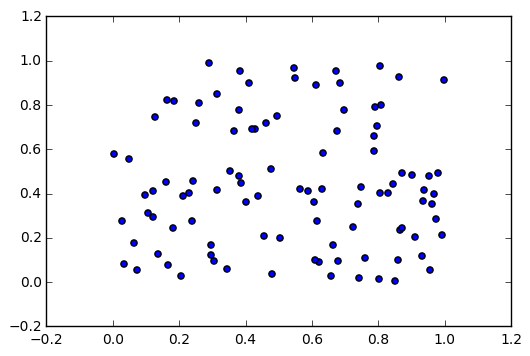

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100  # this makes all the plots a little bigger
x, y = np.random.random([2, 100])
plt.scatter(x, y)
plt.show()

We can change the marker, add labels to the axes, change the ranges plotted, add a grid, and a title:

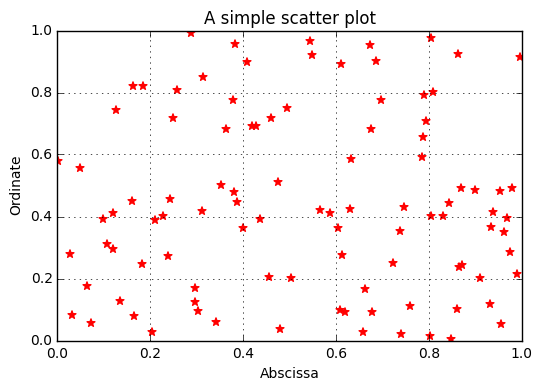

In [100]:
plt.scatter(x, y, marker = '*', color = 'r', s = 35)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A simple scatter plot')
plt.show()

A plot with error bars:

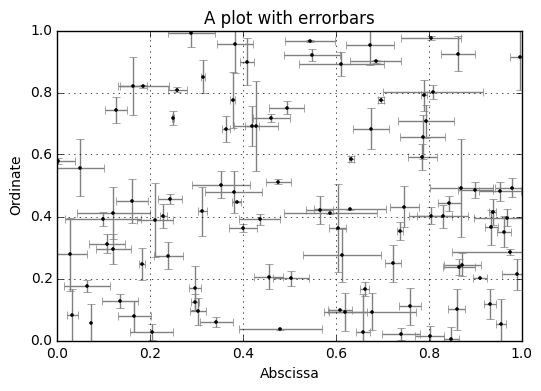

In [101]:
xerr = np.random.normal(0., 0.05, 100)
yerr = np.random.normal(0., 0.05, 100)
plt.errorbar(x, y, xerr, yerr, fmt = '.k', ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A plot with errorbars')
plt.show()

OK, so what happens when instead of 100 data points, we have 100,000. In this case, we will be overwhelmed by a simple scatter plot and need to do something to make the visual more manageable. One option is to reduce the transparency (and size) of the markers which can be particularly useful if you plotting some other smaller distribution on top:

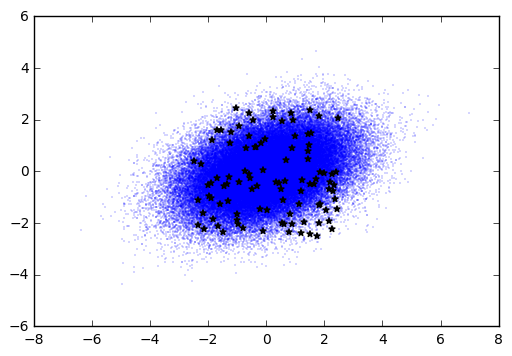

In [102]:
mean, cov = [0., 0.], [(2., 0.5), (0.5, 1.)] 
data = np.random.multivariate_normal(mean, cov, 100000)
a, b = data.T
plt.scatter(a, b, marker = '.', color = 'b', s = 1, alpha = 0.2)
plt.scatter(5. * x - 2.5, 5. * y - 2.5, marker = '*', color = 'k')
plt.show()

<b>Exercise 3:</b> Plot the time as a function of n for the factorial exercise and using the three different functions (fn(x), fn2(x), and fn3(x)) that you used in the previous exercise.

### Interpolation of tabulated data

<b>Reading:</b> notes below, as well as $\S$[3.0-3.6](https://umich.instructure.com/files/2342968/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes).

All data available to us are presented in a tabulated form. Even when we look at a line on a plot of $y$ vs. $x$, it is not a continuous function but a set of discrete data points (an array of values $x_i$ and $y_i$, for $i=0, N$, in computer representation).

Sometimes it is desirable to know the expected value of $y$ at a point between the tabulated $x_i$.  Such an expectation function is called interpolating function, and the process is called interpolation.

Let's look at an example. Remember to execute each cell.  First, set up the necessary libraries.

In [103]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Now let's create a simple dataset and plot it.

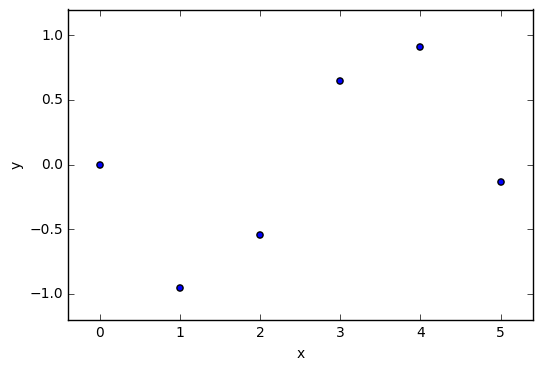

In [104]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.sin(5.*x)

plt.xlim(-0.4, 5.4)
plt.ylim(-1.2, 1.2)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y)
plt.show()

Is there a unique way to connect the points? Your eye may guide you to a smooth curve going up and down, for example using straight lines.  Let's plot it below.

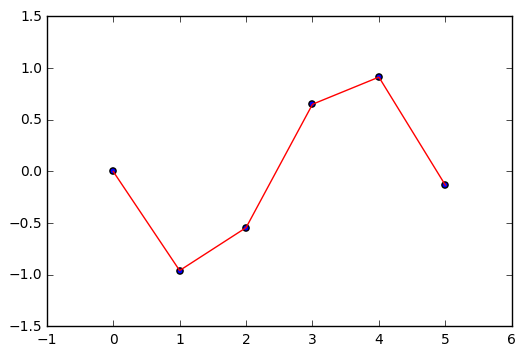

In [105]:
plt.plot(x, y, 'r-')
plt.scatter(x, y)

Now let's plot the real function used to generate these points.

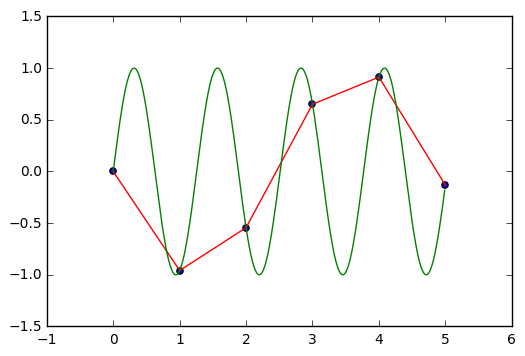

In [106]:
plt.scatter(x, y)
plt.plot(x, y, 'r-')

# overplot the generating function
xa = np.arange(0, 5, 0.01)
plt.plot(xa, np.sin(5.*xa), 'g-')

We can see that we missed a lot of ups and downs!  The point of this exercise is to illustrate that there is no unique way to connect discrete data points.  So, what should we do in practice?

The answer depends on what we know and what we want to achieve.  If we know absolutely nothing about the origin of our data points (how they were obtained, what they represent), then we go for straight lines as in the example above.  It is called 'linear interpolation' and is the most basic, and robust, way of estimating the value of $y$ between the data points.

However, if we know that the data represent measurements of some fairly predictable variable, which should vary smoothly with $x$, then we can use higher-order interpolation schemes.  The most common is 'spline interpolation'.

Let's use functions [interpolate.interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) and [interpolate.UnivariateSpline](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) provided by the SciPy package.

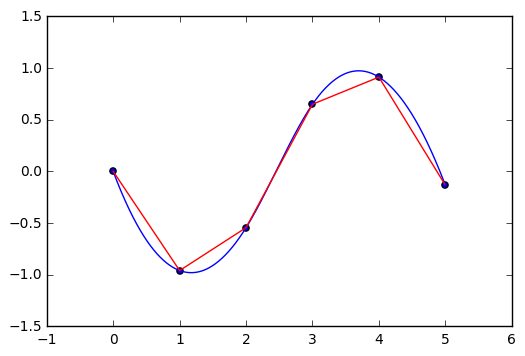

In [107]:
yint = interpolate.interp1d(x, y, kind='linear')
yspline = interpolate.UnivariateSpline(x, y, s=0)

plt.scatter(x, y)
plt.plot(xa, yspline(xa), 'b-', label='spline')
plt.plot(xa, yint(xa), 'r-', label='cubic')

The red line corresponds to the unique third-order (cubic) polynomial that goes through the all data points exactly.  

The blue line corresponds to a spline function that guarantees a continuous second derivative of the interpolating function.  The idea behind splines is to add a cubic polynomial to a linear function, such that $y'' = d^2y/dx^2$ varies linearly between each neighbor pair of data points $x_i$ and $x_{i+1}$, and the first derivative $y' = dy/dx$ is continuous across the data points.  It turns out that there is an (almost) unique solution that satisfies these requirements.  Almost unique because $y''$ needs to be specified at the two end points; these are usually set to zero, enforcing linear interpolation beyond the range of available data.  It makes sense - we should never use non-linear extrapolation.

The parameter $s$ in the UnivariateSpline function above allows a smoother fit, which passes acceptably close to the data points, but not necessarily exactly through them.  The larger $s$, the larger an acceptable deviation:
$\sum_i (y_i-\mathrm{spl}(x_i))^2 <= s$.
We will come back to this metric when we discuss fitting a model to a dataset.

The UnivariateSpline routine first calculates the fixed coefficients corresponding to the values of $y''_i$ and stores them as an array.  This completely specifies a simple (third-order in $x$) analytical function that describes our data throughout the whole interval of data.  We can then evaluate this function at as many locations as we need without having to repeat the polynomial fit, as in the interp1d routine.

An additional advantage of using spline interpolation is that we can integrate or differentiate the interpolating function analytically, and similarly evaluate $\int y(d) dx$ or $dy/dx$ at any location.  Without any extra calculation!  In fact, it is one of the most convenient ways to evaluate a derivative of a function known only at discrete points.  The UnivariateSpline routine provides the functions to do it.

Lets look at another data set, which we will use later next week.  The data file is located in 'Canvas/Files/Data files'.  Download it and place in the same folder as this Notebook.

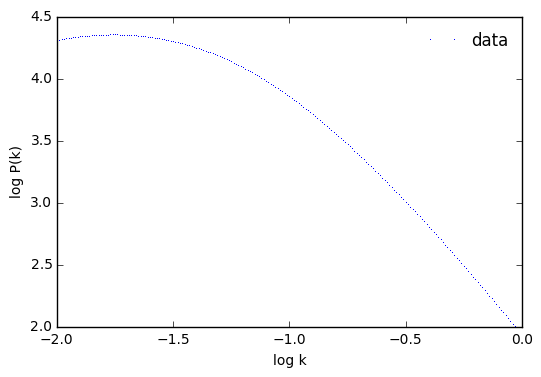

In [111]:
logk_data, logPk_data = np.loadtxt("DataFiles/pk2.dat", unpack=True)

plt.xlim(-2, 0)
plt.ylim(2, 4.5)
plt.xlabel('log k')
plt.ylabel('log P(k)')
plt.plot(logk_data, logPk_data, ',', label='data')
plt.legend(frameon=False)
plt.show()

Interpolation is also very useful for inverting functional relations, or calculating the inverse function.

Look at this example:

In [112]:
xs = np.arange(-np.pi/2., np.pi/2., 0.1)
ys = np.sin(xs)
print 'use %d points for interpolation'%( len(xs) )

xint = interpolate.interp1d(ys, xs, kind='cubic')

for y in [ 0., 0.5, 0.99 ]:
    x = xint(y)
    print 'interp = %.6f  arcsin = %.6f'%( x*180./np.pi, np.arcsin(y)*180./np.pi )

use 32 points for interpolation
interp = 0.000004  arcsin = 0.000000
interp = 30.000007  arcsin = 30.000000
interp = 81.890925  arcsin = 81.890386


<b>Exercise 4:</b> Create a spline interpolating function for this data set.  Evaluate $P(k)$ and $dP/dk$ it at $k = -0.47$ and $k = 0.52$.  Note that the data are provided as logarithms base-10 for both $k$ and $P(k)$.  You need to transform them accordingly.

### Homework 0 (due Tuesday, Sep 12, 9am)

Write a brief essay entitled <i>Computing in My Life</i>.  Your essay should<br>
$\bullet$ include at least one graphic (picture of your computer? recent photo of yourself?),<br>
$\bullet$ describe computers you use or own,<br>
$\bullet$ describe your experience with any operating systems and software,<br>
$\bullet$ describe your experience with any programming languages,<br>
$\bullet$ list your academic concentration and relevant coursework you have had in physics, astronomy, engineering, computer science,<br>
$\bullet$ tell me what you hope to learn in this class,<br>
$\bullet$ tell me your plans after graduating from Michigan.
<hline>

Please submit your homework as an IPython notebook like this.  It will serve as preparation for future homeworks in IPython notebooks.